In [22]:
try:
  print("Dependencies are already installed. Skipping...")
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram
  from qiskit.quantum_info import Statevector
  from qiskit import Aer
except:
  print("Installing Corresponing Dependencies")
  ! pip install -q qiskit pylatexenc qiskit-aer
  ! pip install -q git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram
  from qiskit import Aer
  from qiskit.quantum_info import Statevector


Dependencies are already installed. Skipping...


In [2]:
qiskit.__version__

'0.25.1'

In [3]:
!rm -r modules

rm: cannot remove 'modules': No such file or directory


In [3]:
import requests
from pathlib import Path
import os

directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)

helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py",
    "algorithms_utils.py":"https://github.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/raw/master/modules/utils/algorithms_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [4]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement
from modules.algorithms_utils import *

In [5]:
backend = Aer.get_backend('statevector_simulator')

In [6]:
qc = quantum_phase_estimation(4,1/8)

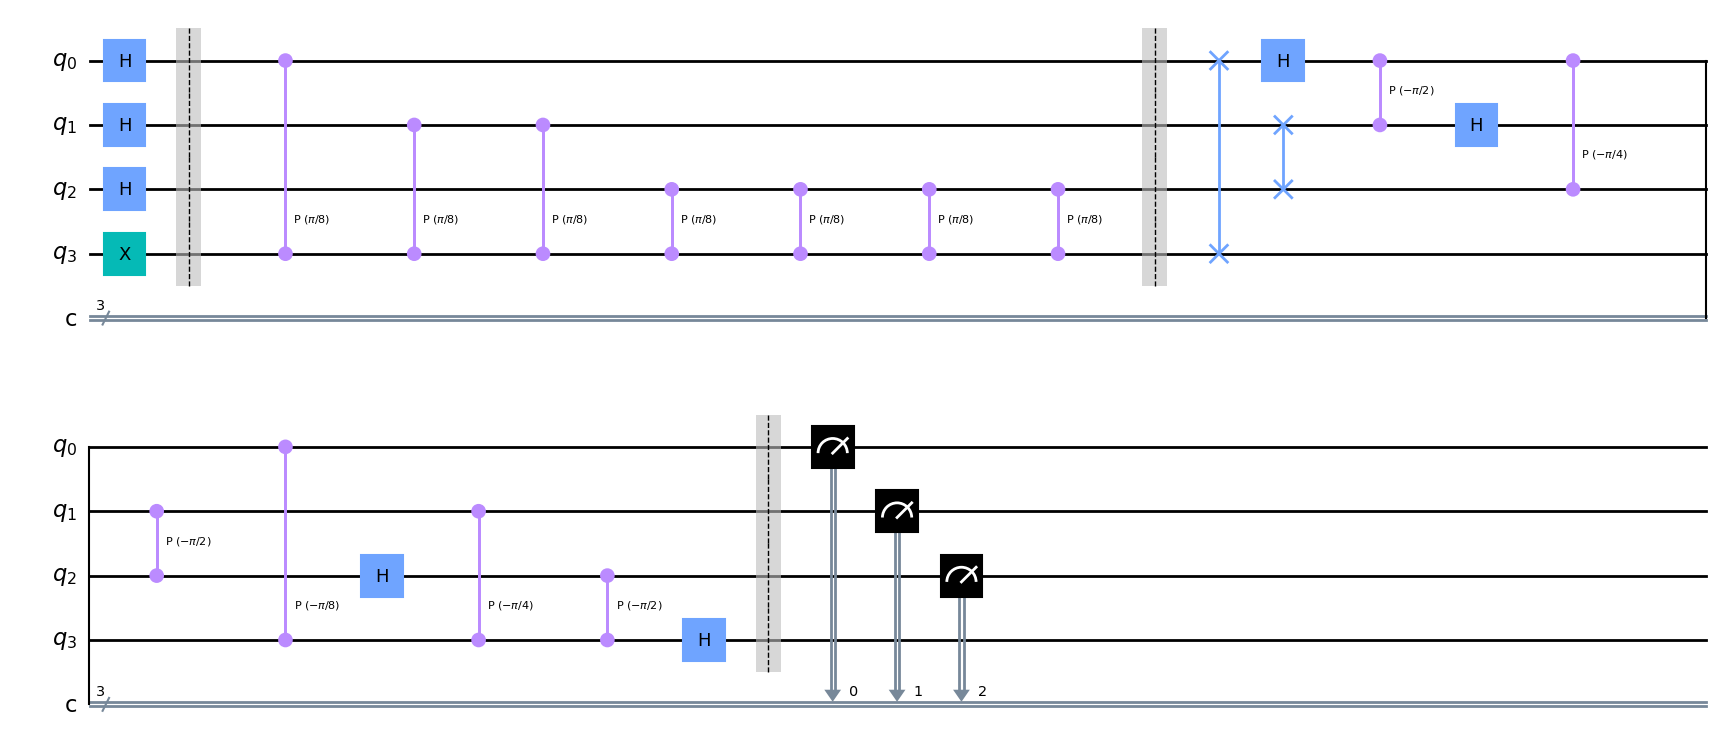

In [7]:
qc.draw("mpl")

In [8]:
jobs = ideal_qc_simulation(qc,backend)

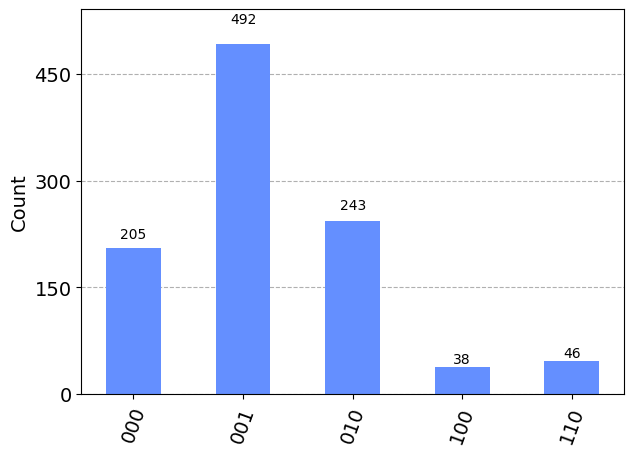

In [9]:
plot_histogram(jobs)

In [12]:
most_probable_postmeasurement_state = max(jobs)
most_probable_postmeasurement_state

'110'

In [14]:
n = len(most_probable_postmeasurement_state)
x = int(most_probable_postmeasurement_state,2)
x,n

(6, 3)

In [16]:
from math import pi,exp

In [26]:
def estimated_phase_shift(x,n):
  return (x * 2 * pi) / (2**n)

def eigenvalue(x,n):
  theta = estimated_phase_shift(x,n)
  return exp(2 * pi * theta)


In [27]:
eigenvalue(x,n)

7226769281987.404